# Introduction to Numpy powered by oneAPI



# Exercises:

Do a page search for each **Exercise** in this notebook. Complete all exercises. Code in cells above each exercise may give insight into a solid approach

In [1]:

import numpy as np
from math import log10 as lg10
import time
import matplotlib.pyplot as plt
import random
import time
%matplotlib inline

Whatever loopy code you have - spend time looking for alternatives such as this. The acceleration can be exrardinary

![Assets/NumpyAxis0.PNG](Assets/NumpyAxis0.PNG)

# Numpy Aggregation

Aggregation is where we operate on an array and generate resulting data with a smaller dimension than the original array

The aggregations can typically be done using different axes to control the direction

![Assets/NumpyAxis0.PNG](Assets/NumpyAxis0.PNG)

![Assets/NumpyAxis11.PNG](Assets/NumpyAxis1.PNG)

Common examples in AI are:
- min
- max
- sum
- mean
- std ... among others

----------------------------------------------------------------------------------
| Functions | Description | 
| --- | --- |
| np.mean() | Compute the arithmetic mean along the specified axis. |
| np.std() | Compute the standard deviation along the specified axis. |
| np.var() | Compute the variance along the specified axis. |
| np.sum() | Sum of array elements over a given axis. |
| np.prod() | Return the product of array elements over a given axis. |
| np.cumsum() | Return the cumulative sum of the elements along a given axis. |
| np.cumprod() | Return the cumulative product of elements along a given axis. |
| np.min(), np.max() | Return the minimum / maximum of an array or minimum along an axis. |
| np.argmin(), np.argmax() | Returns the indices of the minimum / maximum values along an axis |
| np.all() | Test whether all array elements along a given axis evaluate to True. |
| np.any() | Test whether any array element along a given axis evaluates to True. |


Specialty calcualtions exist so always eamine your code with a view to simply and remove loops with off the shelf solutions

For example, in AI there re times we need to add the values of the diagonal of special arrays.

For very long vectors these will accelerate noticibly and more so for larger multdimensional arrays

Below is a naive approach for addng all the diagnoal elements of a smallish array of 1000 x 1000. So the accerlation is reasonable but not outlandish


In [2]:
A = np.arange(1_000_000).reshape(1000, 1000)
Diag = 0

t1 = time.time()
for i in range(len(A)):
    for j in range(len(A)): 
        if i == j:
            Diag += A[i,j]
t2 = time.time()
Elapsed_Diag_base = t2-t1
print("elapsed time: ", Elapsed_Diag_base)
print("Diag: ", Diag)

elapsed time:  0.05763697624206543
Diag:  499999500


## Exercise:

Use a search engine to find numpy method to find the sum of the diagonals of this array.
- Hint: trace
- Hint: Diag = np.trace(A)

In [3]:
t1 = time.time()
### Complete the code below #####

Diag = np.trace(A)

#####################   
t2 = time.time()
Elapsed_Diag_numpy = t2 - t1
print("elapsed time: ", Elapsed_Diag_numpy)
print("Diag: ", Diag)
print("Acceleration: {:4.0f}X".format(Elapsed_Diag_base/Elapsed_Diag_numpy))

elapsed time:  0.0003066062927246094
Diag:  499999500
Acceleration:  188X


# Exercise: Compute Mean & Std of array using NumPy

In [4]:
rng = np.random.default_rng(2021)
# random.default_range is the recommended method for generated random's
# see blog "Stop using numpy.random.seed()" for reasoning
# https://towardsdatascience.com/stop-using-numpy-random-seed-581a9972805f

a = rng.random((10_000_000,))
t1 = time.time()
timing = {}
S = 0
for i in range (len(a)):
    S += a[i]
mean = S/len(a)
std = 0
for i in range (len(a)):
    d = a[i] - mean
    std += d*d
std = np.sqrt(std/len(a))
timing['loop'] = time.time() - t1
print("mean", mean)
print("std", std)

print(timing)

mean 0.49989965005579506
std 0.2886808095773652
{'loop': 5.275381565093994}


In [5]:
t1 = time.time()
print(a.mean())
print(a.std())

timing['numpy'] = time.time() - t1
print(timing)
print(f"Acceleration {timing['loop']/timing['numpy']:4.1f} X")

0.4998996500557974
0.288680809577358
{'loop': 5.275381565093994, 'numpy': 0.11130046844482422}
Acceleration 47.4 X


<BarContainer object of 2 artists>

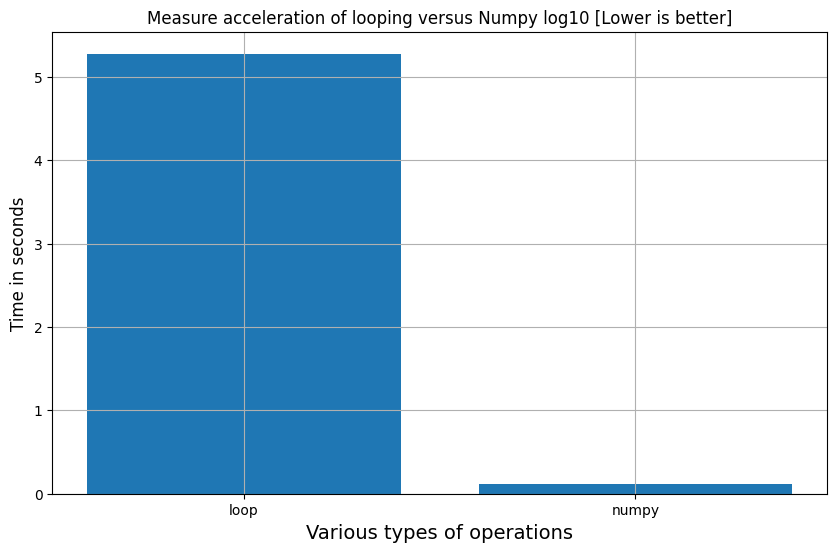

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.title("Measure acceleration of looping versus Numpy log10 [Lower is better]",fontsize=12)
plt.ylabel("Time in seconds",fontsize=12)
plt.xlabel("Various types of operations",fontsize=14)
plt.grid(True)
plt.bar(x = list(timing.keys()), height= list(timing.values()), align='center',tick_label=list(timing.keys()))

In [7]:
print("Done")

Done
